In [1]:
# Import numpy, data, decision tree, random forest classifier, and train_test_split
import numpy as np
import pandas as pd
import umap
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

# Read data in a list call data_sets

In [2]:
# Read data in a list call data_sets
data_sets=os.listdir('/ifs/obds-training/jan21/exercises/machine_learning/Sep_data/')
data_sets

['naive_t.gz',
 'cd56_nk.gz',
 'memory_t.gz',
 'cd4_t_helper.gz',
 'cd34.gz',
 'regulatory_t.gz',
 'b_cells.gz',
 'cd14_monocytes.gz',
 'cytotoxic_t.gz',
 'naive_cytotoxic.gz']

In [3]:
# file_i is to interate over each file in that data_sets list. Create a list of dataframe objects
all_data = [pd.read_csv("/ifs/obds-training/jan21/exercises/machine_learning/Sep_data/" + file_i) for file_i in data_sets]

In [4]:
#Concatenate all data into one set call all_data. Each file contains 400 cells/rows.
all_data = pd.concat(all_data)
all_data.shape

(4000, 6188)

In [6]:
# Each dataframe has 400 cells of each cell type.
# Create labels for each cell in each type. The labels are assigned a number 'naive_t.qz=0', 'cd56_nk.gz=1' etc...
labels = np.repeat(data_sets, 400)
print (labels)
labels_num = np.repeat(range(len(data_sets)), 400)
print (labels_num)

['naive_t.gz' 'naive_t.gz' 'naive_t.gz' ... 'naive_cytotoxic.gz'
 'naive_cytotoxic.gz' 'naive_cytotoxic.gz']
[0 0 0 ... 9 9 9]


In [7]:
all_data.head()

,A1BG,AAAS,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARSD1,AASDHPPT,...,ZNHIT3,ZNHIT6,ZNRD1,ZRANB2,ZRSR2,ZSCAN16,ZSCAN16-AS1,ZSCAN18,ZSWIM7,ZYX
0,0.000000,7.722008,0.0,0.0,0.0,0.0,0.0,7.722008,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.722008
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,8.488964,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,8.488964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.174312


# Use umap with 20 neighbours to get lower dim for plotting

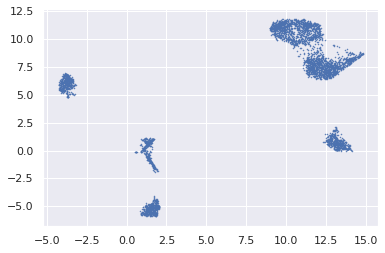

In [28]:
# We imported the umap library, if we need to use UMAP function in the umap library, we need to use umap.UMAP to call the UMAP function
# Set random seed 'random_state=42'
umap_instance=umap.UMAP(n_components=2, n_neighbors = 20, random_state=42)
umap_transformed=umap_instance.fit_transform(all_data)
plt.plot(umap_transformed[:,0],umap_transformed[:,1],'o',markersize=0.5)

In [29]:
# Check the number of rows
len(umap_transformed[:,0])

4000

In [30]:
# Check the number of columns
len(umap_transformed[0,:])

2

In [31]:
#Create a data frame with umap dims and labels as an extra column
# Combine the arrays 'labels' and 'umap_transformed dimensions' into a new dataframe, and then transpose the dataframe
umap_bloodcells=pd.DataFrame([labels, umap_transformed[:,0], umap_transformed[:,1]]).T
umap_bloodcells.columns=['Labels','Dim_1','Dim_2']
print(umap_bloodcells)

                  Labels    Dim_1    Dim_2
0             naive_t.gz  12.4626  7.84672
1             naive_t.gz  12.4187   7.5191
2             naive_t.gz  11.4498  7.48505
3             naive_t.gz  11.4348  6.78898
4             naive_t.gz  11.1428  7.94338
...                  ...      ...      ...
3995  naive_cytotoxic.gz  9.66661   11.248
3996  naive_cytotoxic.gz  9.35964  11.1544
3997  naive_cytotoxic.gz  9.31993   10.713
3998  naive_cytotoxic.gz  9.85742  11.2823
3999  naive_cytotoxic.gz  9.31678   10.743

[4000 rows x 3 columns]


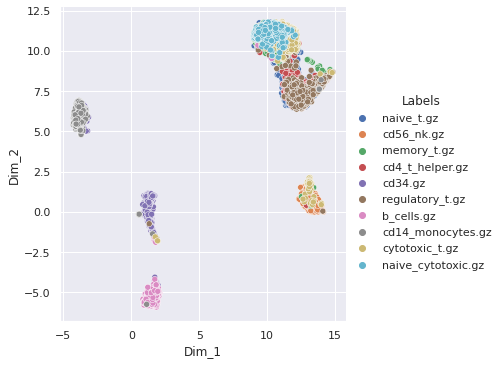

In [32]:
#Plot the new dataframe
sns.relplot(data=umap_bloodcells,x='Dim_1',y='Dim_2',hue='Labels')

# Split data into train and test and run decision tree

In [34]:
# Split the data and the labels into 0.25 test data
data_train, data_test, labels_train, labels_test = train_test_split(all_data, labels_num, test_size=0.25)

In [41]:
# Train the DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Fit the data with the classifier. We are using the default parameters
clf = clf.fit(data_train, labels_train)
# First score to check the prediction score
print(clf.score(data_train, labels_train))
print(clf.score(data_test, labels_test))

1.0
0.68


# Random forest

In [43]:
#Train a random forest with the same data and calculate the score for training data and test data
clf_forest = RandomForestClassifier() # Default parameters, these often need tuning
clf_forest = clf_forest.fit(data_train, labels_train)
print(clf_forest.score(data_train, labels_train))
print(clf_forest.score(data_test, labels_test))

1.0
0.814


In [44]:
# Change the number of trees unsed (n_estimators) to 250
clf_forest = RandomForestClassifier(n_estimators=250) # Default parameters, these often need tuning
clf_forest = clf_forest.fit(data_train, labels_train)
print(clf_forest.score(data_train, labels_train))
print(clf_forest.score(data_test, labels_test))

1.0
0.837


In [49]:
#Calculate the importance for each feature it uses (genes) to classify and look at the top features
feature_importances = pd.DataFrame(clf.feature_importances_,
                                  index=all_data.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(20)

,importance
CD74,0.101534
GNLY,0.098344
S100A8,0.091458
HLA-DRA,0.066510
CD8B,0.059927
MALAT1,0.047301
RPS27,0.038699
S100A4,0.037989
ZFAS1,0.014746
RPS15A,0.013001


In [50]:
# Use different classifiers from scikit list
clf_svm = svm.SVC() # Default parameters, these often need tuning
clf_svm = clf_svm.fit(data_train, labels_train)
print(clf_svm.score(data_train, labels_train))
print(clf_svm.score(data_test, labels_test))

0.912
0.851
